<a href="https://colab.research.google.com/github/curnowbronwyn/MAT422/blob/main/HW_3_5_and_3_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homework 3.5, 3.6
Authors:  Megan Hoch and Bronwyn Curnow

# 3.5 K Means

**K-means:** A popular method of vector quantization that aims to partition n observations into k clusters in which each observation belongs to the cluster with the nearest mean, serving as a prototype of the cluster.

The objective is to find: $arg min_{s} \sum_{i=1}^{k}WCSS_{i}$ and show that k-means converges by proving that the function is monotonically decreasing for each iteration. Thus we get $v= \frac{1}{|S_{i}|}\sum_{\textbf{x}=(x_{j})\in S_{i}} x_{j}$

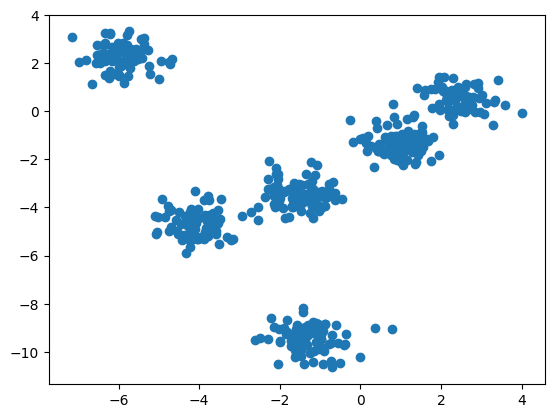

In [2]:
#Generate random blobs. Find K Means
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn import datasets, svm, metrics
from sklearn.model_selection import train_test_split

#Create and show random blobs of data
x, y = make_blobs(n_samples = 500, centers = 6, cluster_std = 0.50, random_state = 2)
plt.scatter(x[:, 0], x[:, 1])


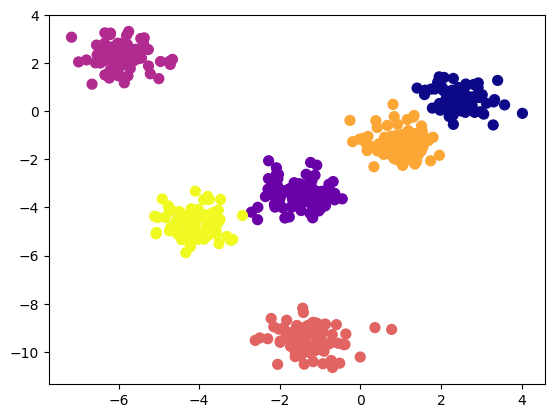

In [3]:
kmeans = KMeans(n_clusters = 6)
kmeans.fit(x)
means = kmeans.predict(x)
plt.scatter(x[:,0], x[:,1], c = means, s= 50, cmap = 'plasma')
plt.show()

Here we see an example of 6 tight groups of data, separated into groups using kmeans.

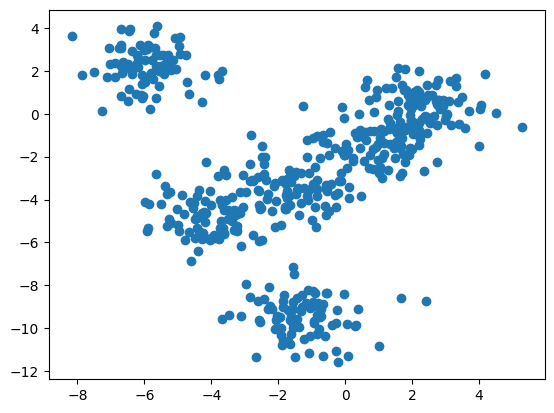

In [4]:
#Create and show random blobs of data
x, y = make_blobs(n_samples = 500, centers = 6, cluster_std = .9, random_state = 2)
plt.scatter(x[:, 0], x[:, 1])

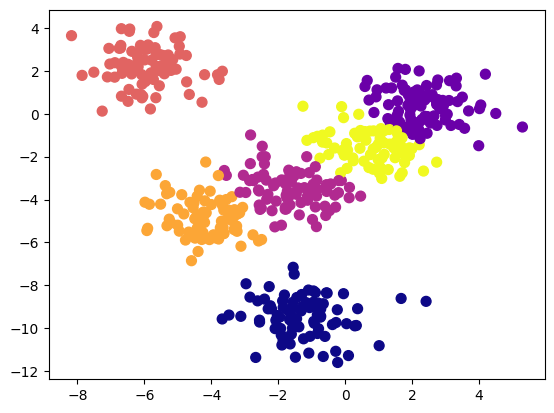

In [5]:
kmeans = KMeans(n_clusters = 6)
kmeans.fit(x)
means = kmeans.predict(x)
plt.scatter(x[:,0], x[:,1], c = means, s= 50, cmap = 'plasma')

Here we see the same data, just with a higher standard deviation within the groups. We can see that the kmeans groups are not quite as nice. Some dots overlap, and the grouping are less clear.

# 3.6 Support Vector Machine




Given the training dataset of n points in the form $(\textbf{x}_{1},y_{1}),\ldots,(\textbf{x}_{n},y_{n})$. A hyperplane can be written as the set of points $\textbf{x}$ satisfying $\textbf{x}^{T}\textbf{x}-b = 0$, where $\textbf{w}$ is the normal vector to the hyperplane. To find stochastic gradient descent pick an i at random and update according to: New $\textbf{w} =$ Old $\textbf{w}- \beta
\left\{ \begin{array}{rcl}
2\lambda \textbf{w} - \frac{1}{n}y_{i}\textbf{x}_{i} & \mbox{ if $ 1 - y_{i}(\textbf{w}^{T}x_{i} - b) > 0$} \\  2\lambda\textbf{w} & \mbox{otherwise}
\end{array}\right.$

In [7]:
#import a dataset and SVM it. Kachow
df = datasets.load_breast_cancer()
x_train, x_test, y_train, y_test = train_test_split(df.data, df.target, test_size = 0.3, random_state = 0)

classify = svm.SVC(kernel = 'linear')
classify.fit(x_train, y_train)
predicted = classify.predict(x_test)

print("Accuracy:", metrics.accuracy_score(y_test, predicted))
print("R^2:", metrics.r2_score(y_test, predicted))

Accuracy: 0.9590643274853801
R^2: 0.8240740740740741


Here we use SVM, another regression model, on the breast cancer dataset from sklearn.